In [142]:
# MANE 4962 Homework 4 Question 1
# Name: Calvin Chan

In [143]:
# Load Modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.model_selection import GridSearchCV 
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler 
from tensorflow.keras.datasets import cifar10 # Import CIFAR-10 Dataset

In [144]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("training images shapes: ", X_train.shape)
print("testing images shapes: ", X_test.shape)
print("training targets shapes: ", y_train.shape)
print("testing targers shapes: ", y_test.shape)

training images shapes:  (50000, 32, 32, 3)
testing images shapes:  (10000, 32, 32, 3)
training targets shapes:  (50000, 1)
testing targers shapes:  (10000, 1)


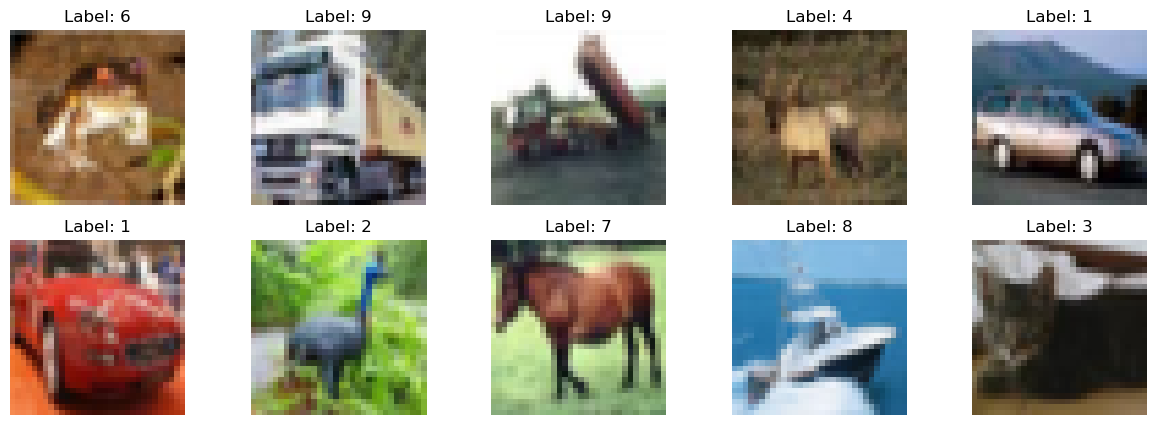

In [145]:
# Question 1a:
# Visualize the CIFAR-10 dataset by plotting Images 
fig, axes = plt.subplots(2, 5, figsize=(15, 5))
for i, pic in enumerate(axes.flatten()):
    pic.imshow(X_train[i])
    pic.set_title(f'Label: {y_train[i][0]}')
    pic.axis('off')

plt.show()

In [146]:
# Question 1b:

# Data Modification:
X_train = X_train.reshape(50000, 32*32*3)
X_test = X_test.reshape(10000, 32*32*3)
X_train = X_train/255
X_test = X_test/255

# Spliting Dataset to 70/30 Split
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.30,
    train_size=0.70)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [147]:
# Display Data
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

X_train shape : (42000, 3072)
X_test shape : (18000, 3072)
y_train shape : (42000, 10)
y_test shape : (18000, 10)


In [148]:
# Tunning of the Hyperparameters using for loops
# Default Parameters that will be constant throughout is the input shape, optimizer which we will use ADAM, the output layer, and compilier settings

# Hyperparameters that we will be tunning are the nodes per layer, the learning rate, and the number of layers
num_nodes = np.array([100, 125, 150, 175, 200])
lr = np.array([0.001, 0.0001])
num_layers = np.array([3, 4, 5])

# Define function that will create model
def build_model(num_layers, num_nodes, learning_rate): 
    model = Sequential()
    model.add(keras.Input(shape=(32*32*3,))) # Input Layer

    for _ in range(num_layers):
        model.add(Dense(units = num_nodes, activation='relu')) # Add Hidden Layer (RELU will be constant)

    model.add(Dense(10, activation='softmax')) # Output Layer
    opt = keras.optimizers.Adam(learning_rate = learning_rate) # Optimizer = ADAM
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy']) # Mean Squared Error = Loss

    return model

# Test of function (Comment out once verify)
# model = build_model(2, 50, 0.01)
# model.summary()

In [149]:
# For Loop to test out hyperparameter using gridsearch method:
tol = 0;
for i in range(num_layers.size):

    for j in range(num_nodes.size): 

        for k in range(lr.size): 

            model = build_model(num_layers[i], num_nodes[j], lr[k])
            history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 25, verbose = 0) # Epoch of 25 will be constant
            acc = history.history['accuracy'][-1] # Accuracy of the Last Epoch

            if acc > tol: # Will return the tuned model with the greatest accuracy
                tol = acc
                loss = history.history['loss']
                val_loss = history.history['val_loss']
                accuracy = history.history['accuracy']
                val_accuracy = history.history['val_accuracy']
                parameters = [num_layers[i], num_nodes[j], lr[k]]


In [150]:
print("From result of hyperparameters tuning via grid-serach -> The best tuned model is: " + 
      "Number Layers: " + str(parameters[0]) + ", Number of Nodes: " + str(parameters[1]) + ", Learning Rate: " + str(parameters[2]))

model_best = build_model(parameters[0], parameters[1], parameters[2])
model_best.summary()

From result of hyperparameters tuning via grid-serach -> The best tuned model is: Number Layers: 4, Number of Nodes: 200, Learning Rate: 0.0001


Model: "sequential_95"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_468 (Dense)               │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_469 (Dense)               │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_470 (Dense)               │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_471 (Dense)               │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_472 (Dense)               │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 737,210 (2.81 MB)

 Trainable params: 737,210 (2.81 MB)

 Non-trainable params: 0 (0.00 B)

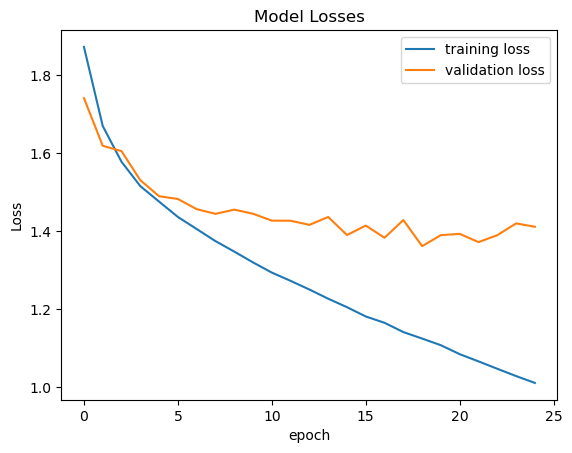

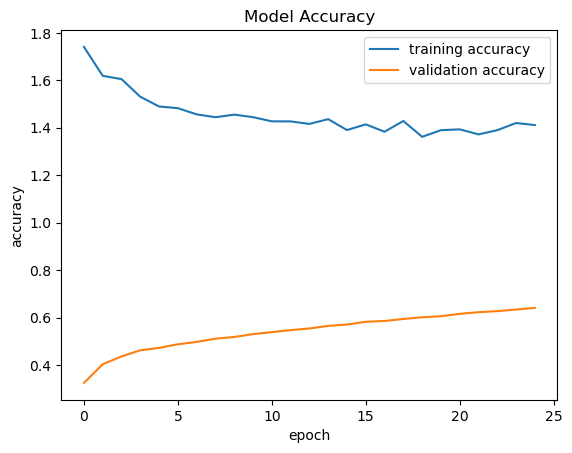

In [151]:
# Question 1c and 1d: 
# Plot Validation and Traning Losses
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Losses')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'])
plt.show()

plt.plot(val_loss)
plt.plot(accuracy)
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'])
plt.show()